In [1]:
import json

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

from collections import Counter
import re

import time

import os

In [7]:
filename = 'grunt'

with open(f'{os.getcwd()}/json_files/{filename}.json', 'r', encoding="utf-8") as myfile:
    data = myfile.read()

In [8]:
def get_vocab(text):
    
    unique = {}
    for word in text:
        if word in unique:
            unique[word] += 1
        else:
            unique[word] = 1
            
    return unique

def number_unique_words(vocab):
    return len(vocab)

In [10]:
obj = json.loads(data)


obj

{'name': 'ҐРУНТ: чат',
 'type': 'private_supergroup',
 'id': 1541732041,
 'messages': [{'id': 10138, 'type': 'unsupported'},
  {'id': 10139,
   'type': 'message',
   'date': '2023-05-15T17:52:56',
   'edited': '2023-05-15T17:53:02',
   'from': 'крäм',
   'from_id': 'user1311136256',
   'reply_to_message_id': 10138,
   'file': '(File not included. Change data exporting settings to download.)',
   'thumbnail': '(File not included. Change data exporting settings to download.)',
   'media_type': 'animation',
   'mime_type': 'video/mp4',
   'duration_seconds': 10,
   'width': 240,
   'height': 240,
   'text': ''},
  {'id': 10140,
   'type': 'message',
   'date': '2023-05-15T17:52:57',
   'from': 'Дмитрий Волнянский',
   'from_id': 'user389899171',
   'reply_to_message_id': 10138,
   'text': '+'},
  {'id': 10142,
   'type': 'message',
   'date': '2023-05-15T17:53:01',
   'from': 'Nataliia Yavorska',
   'from_id': 'user608914593',
   'reply_to_message_id': 10138,
   'text': 'Клас ❤️'},
  {'id

In [7]:
obj['messages'][310]

{'id': 10466,
 'type': 'message',
 'date': '2023-05-15T23:14:14',
 'edited': '2023-05-15T23:14:25',
 'from': 'weldingtorch',
 'from_id': 'user520737102',
 'reply_to_message_id': 10377,
 'text': 'Речник Пентагону сказав, що М1.'}

In [8]:
texts = ''

for i in range(0, len(obj['messages'])):
    if 'text' in obj['messages'][i].keys():
        message = obj['messages'][i]['text']
        if isinstance(message, list):
            for i in range(0, len(message)):
                if isinstance(message[i], dict):
                    texts += '\n'+ message[i]['text']
                else:
                    texts += '\n' + message[i]
        else:
            texts += '\n' + message

In [219]:
#counter = 0

authors = []

for i in range(0, len(obj['messages'])):
    if 'from' in obj['messages'][i].keys():
        authors.append(obj['messages'][i]['from'])
        #if obj['messages'][i]['from'] == 'LIGA.net':
        #   counter += 1

        
authors = Counter(authors)
authors

Counter({'крäм': 1,
         'Дмитрий Волнянский': 1,
         'Nataliia Yavorska': 5,
         'Artem': 6,
         'Міша': 3,
         'AK': 8,
         'Bohdan': 73,
         '🚭': 8,
         'Ілля Захватов': 9,
         'Belitruin': 1,
         '💙Настя💜': 1,
         'Michael': 17,
         'marcelopelo': 5,
         '✙ Перша приватна мемарня': 1,
         'Vsev': 3,
         'Rob': 5,
         'Alex ➔': 3,
         'Максим': 27,
         'Hanna Liuisina 💛💙': 1,
         'Pavel': 3,
         'Feelin': 21,
         'ҐРУНТ': 605,
         'Volodymyr. 🇺🇦': 2,
         'Ігор': 48,
         'Roman🕷️': 22,
         'Yurii Bondarchuk': 1,
         'Andrew': 14,
         'Roma Kornienko': 1,
         'Y.M.': 2,
         'Sancho pancho': 3,
         '𝔸𝕟𝕒𝕤𝕥𝕒𝕤𝕚𝕒✨': 1,
         'Олександр О': 1,
         'Mυκσlα ✙➔🍉': 63,
         'Nik ✌🏻🇺🇦': 2,
         'Byzenko': 4,
         '@': 511,
         'Женя': 10,
         'Dmytro': 69,
         'ok': 2,
         'Andrii S.': 13,
         'Lener': 1,

In [220]:
authors = pd.DataFrame.from_dict(authors, orient='index').reset_index()#, columns=['word', 'freq'])\
authors = authors.rename(columns={"index": "author", 0: "messages"})
authors = authors.sort_values(by="messages", ascending=False, ignore_index=True)

authors

,author,messages
0,ҐРУНТ,605
1,@,511
2,Volodymyr,406
3,Den,262
4,Oleksandr,204
...,...,...
4007,Михайло Лебєдєв,1
4008,natib,1
4009,˗ˏˋ ῾ ♡˒ 𝘳𝘦𝘴𝘶𝘳𝘨𝘢𝘮 ˖ °₊,1
4010,Ni_chan,1


In [2]:
(authors['messages'].sum())

NameError: name 'authors' is not defined

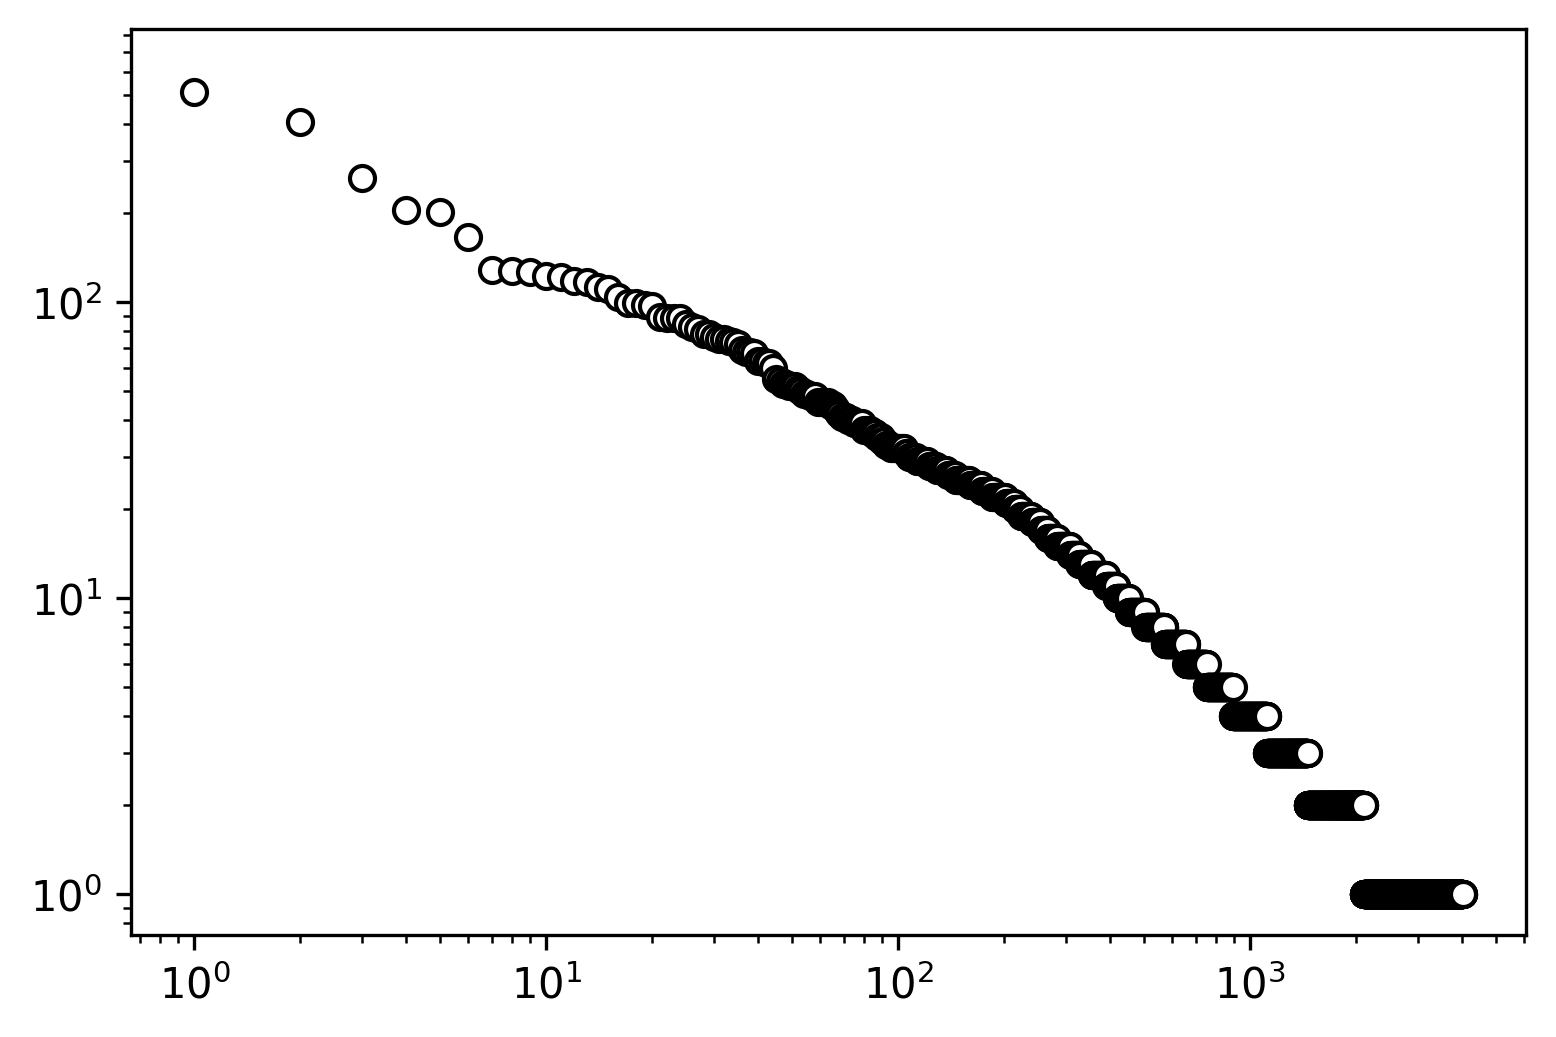

In [222]:
fig, ax = plt.subplots(dpi=300)

ax.set(xscale='log', yscale='log')

ax.scatter(authors.index, authors['messages'], facecolor='white', edgecolor='black')

In [186]:
len(texts)

1418368

In [37]:
texts = texts.replace('.', ' ').replace('\n', ' ').replace(',', ' ')

texts = re.sub(r'\W+', ' ', texts)

texts = re.sub('\s+', ' ', texts)

words = texts.split(' ')

In [38]:
with open(f'{os.getcwd()}/{filename}.txt','w') as file:
    file.write(texts.lower())

In [33]:
filename = 'grunt'

with open(f'{os.getcwd()}/txt_files/{filename}.txt','r') as file:
    text = file.read()

In [34]:
words = text.split(' ')

In [35]:
len(set(words[:700]))

1

In [39]:
vocab = pd.DataFrame.from_dict(Counter(words), orient='index').reset_index()#, columns=['word', 'freq'])\
vocab = vocab.rename(columns={"index": "word", 0: "freq"})
vocab = vocab.sort_values(by='freq', ascending=False, ignore_index=True)
vocab.index = vocab.index + 1
vocab['norm_freq'] = vocab['freq'] / vocab['freq'].sum()
vocab

,word,freq,norm_freq
1,не,8411,0.026089
2,і,6308,0.019566
3,в,6127,0.019004
4,на,4797,0.014879
5,що,4588,0.014231
...,...,...,...
59222,використовуйте,1,0.000003
59223,неточний,1,0.000003
59224,юліанський,1,0.000003
59225,лярва,1,0.000003


In [40]:
end = 14000

slope, intercept, r, p, err = stats.linregress(x=np.log(vocab.index[10:end]), y=np.log(vocab['freq'][10:end]))

slope, intercept, r

(-0.9818633601656713, 10.273378843712813, -0.9966659513096666)

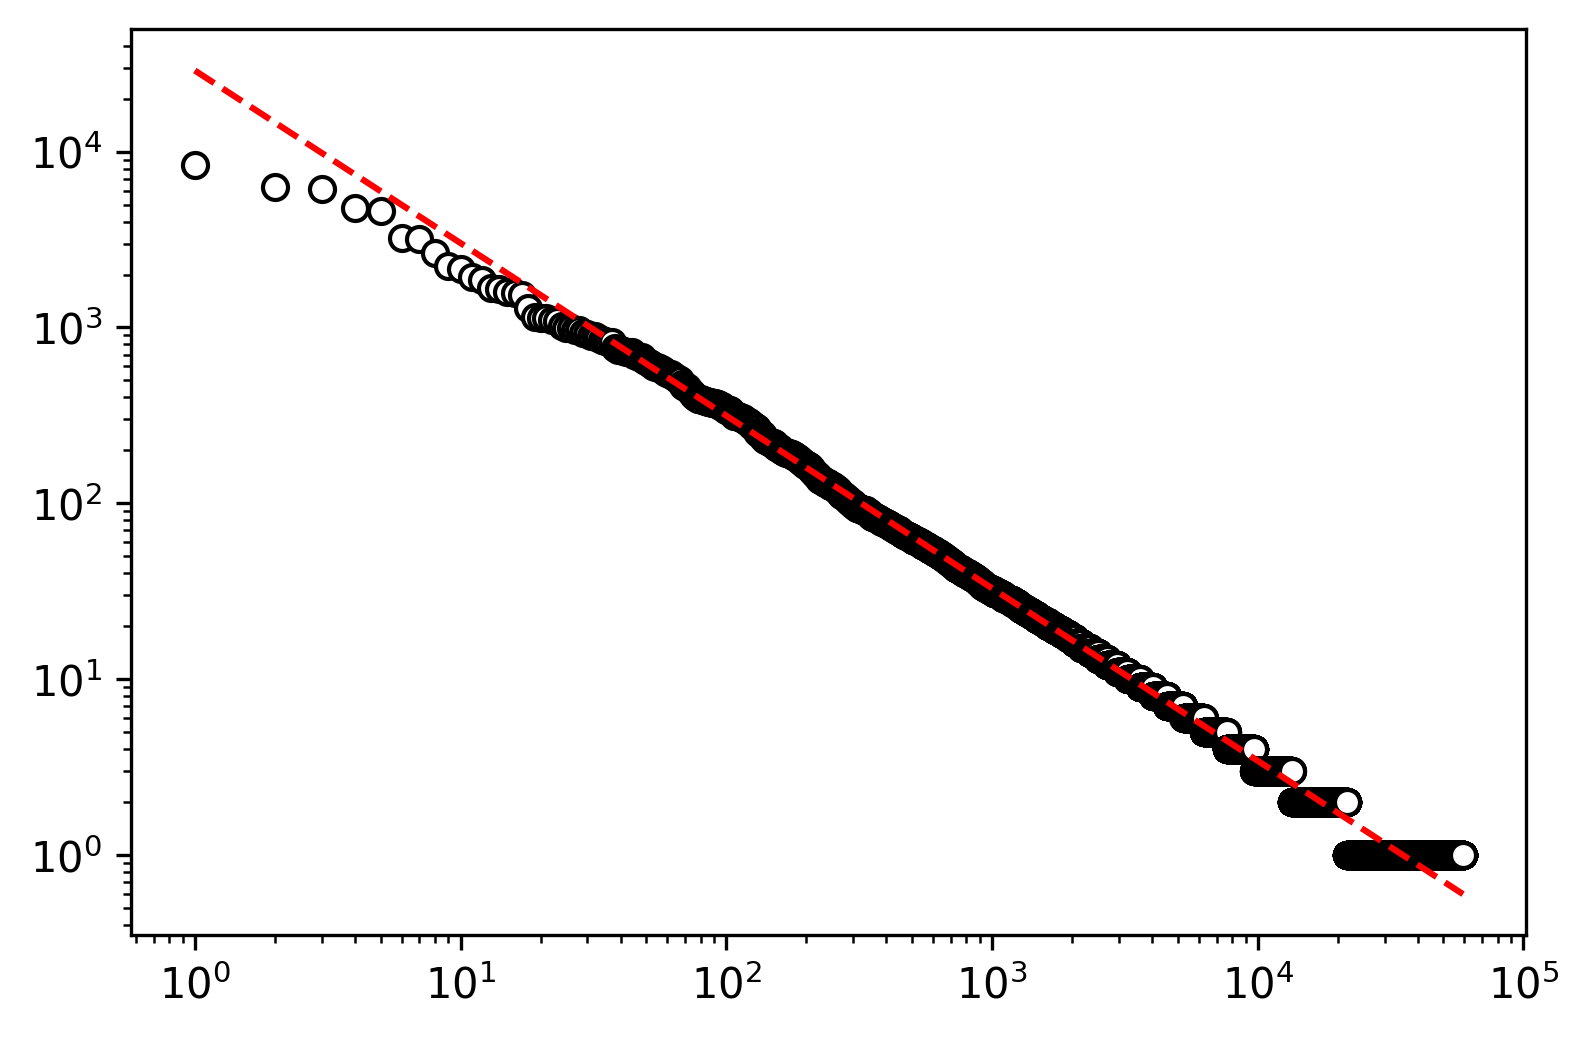

In [41]:
fig, ax = plt.subplots(dpi=300)

ax.set(xscale='log', yscale='log')

ax.scatter(vocab.index, vocab['freq'], facecolor='white', edgecolor='black')
ax.plot(vocab.index.to_numpy(), np.e**intercept*vocab.index.to_numpy()**slope, '--', color='red')

In [42]:
N1 = len(vocab[vocab['freq'] == 1])
N2 = len(vocab[vocab['freq'] == 2])
N_1N = len(vocab[vocab["freq"] == 1]) / len(vocab)
N_2N = len(vocab[vocab["freq"] == 2]) / len(vocab)
RR = 1 / len(vocab) * np.sum(np.power(vocab['norm_freq'], 2))
entropy = -np.sum(vocab['norm_freq'] * np.log(vocab['norm_freq']))

print(f'text length {len(vocab)}\n')
print(f'hapax legomena {N1}\n')
print(f'dis legomena {N2}\n')
print(f'hapax legomena fraction {N_1N:.4}\n')
print(f'dis legomena fraction {N_2N:.4}\n')
print(f'repeat rate {RR:.4}\n')
print(f'entropy {entropy:.4}\n')

text length 59226

hapax legomena 37530

dis legomena 8293

hapax legomena fraction 0.6337

dis legomena fraction 0.14

repeat rate 4.816e-08

entropy 8.535



In [27]:
lengths = []
vocabs = []

step = 100

start = time.perf_counter()
for i in range(100, len(words), step):
    #start = time.perf_counter()
#     subtext = texts[:i]
    #subtext_time = time.perf_counter()
    
#     print(f'subtext time {subtext_time - start}')
    
#     lengths.append(len(subtext))
    lengths.append(i)
#     length_time = time.perf_counter()      
    
#     print(f'length append time {length_time - subtext_time}')
    
#     vocabs.append(len(get_vocab(subtext)))
    vocabs.append(len(set(words[:i])))
#     vocab_time = time.perf_counter()
    
#     print(f'vocab append time {vocab_time - length_time}')
    
end = time.perf_counter()
    
print(f'loop time for {len(words)} elements is {(end - start):.3}')

NameError: name 'texts' is not defined

In [28]:
vocabs

[85,
 155,
 229,
 293,
 354,
 427,
 503,
 561,
 612,
 659,
 718,
 782,
 830,
 882,
 947,
 1006,
 1060,
 1109,
 1151,
 1203,
 1263,
 1314,
 1361,
 1426,
 1489,
 1540,
 1594,
 1638,
 1678,
 1730,
 1776,
 1831,
 1874,
 1923,
 1966,
 2002,
 2052,
 2104,
 2154,
 2200,
 2236,
 2281,
 2320,
 2351,
 2403,
 2452,
 2487,
 2519,
 2560,
 2598,
 2638,
 2681,
 2721,
 2772,
 2815,
 2860,
 2899,
 2938,
 2974,
 3023,
 3061,
 3103,
 3141,
 3180,
 3221,
 3264,
 3290,
 3323,
 3373,
 3407,
 3452,
 3481,
 3513,
 3556,
 3593,
 3626,
 3663,
 3704,
 3745,
 3785,
 3825,
 3864,
 3906,
 3942,
 3972,
 4012,
 4038,
 4080,
 4120,
 4173,
 4204,
 4242,
 4291,
 4330,
 4356,
 4379,
 4429,
 4465,
 4500,
 4519,
 4547,
 4573,
 4610,
 4645,
 4678,
 4700,
 4735,
 4766,
 4791,
 4819,
 4873,
 4899,
 4934,
 4969,
 5001,
 5026,
 5061,
 5098,
 5130,
 5161,
 5194,
 5224,
 5253,
 5293,
 5316,
 5340,
 5365,
 5410,
 5451,
 5498,
 5536,
 5567,
 5593,
 5628,
 5658,
 5681,
 5712,
 5743,
 5768,
 5801,
 5839,
 5891,
 5927,
 5949,
 5977,
 

In [29]:
growth = pd.DataFrame({'length': lengths, 'vocab': vocabs})

growth.to_csv(f'{os.getcwd()}/vocab_growth/{filename}.csv', index=False)
growth

,length,vocab
0,100,85
1,200,155
2,300,229
3,400,293
4,500,354
...,...,...
2247,224800,45395
2248,224900,45415
2249,225000,45436
2250,225100,45455


In [5]:
growth = pd.read_csv(f'{os.getcwd()}/vocab_growth/grunt.csv',)

growth

,length,vocab
0,100,87
1,200,154
2,300,234
3,400,309
4,500,378
...,...,...
19079,1908000,53322
19080,1908100,53322
19081,1908200,53322
19082,1908300,53322


In [29]:
end = 4000

slope, intercept, r, p, err = stats.linregress(x=np.log(growth['length'][:end]), y=np.log(growth['vocab'][:end]))
slope, r

(0.7074589804903081, 0.9970958665557225)

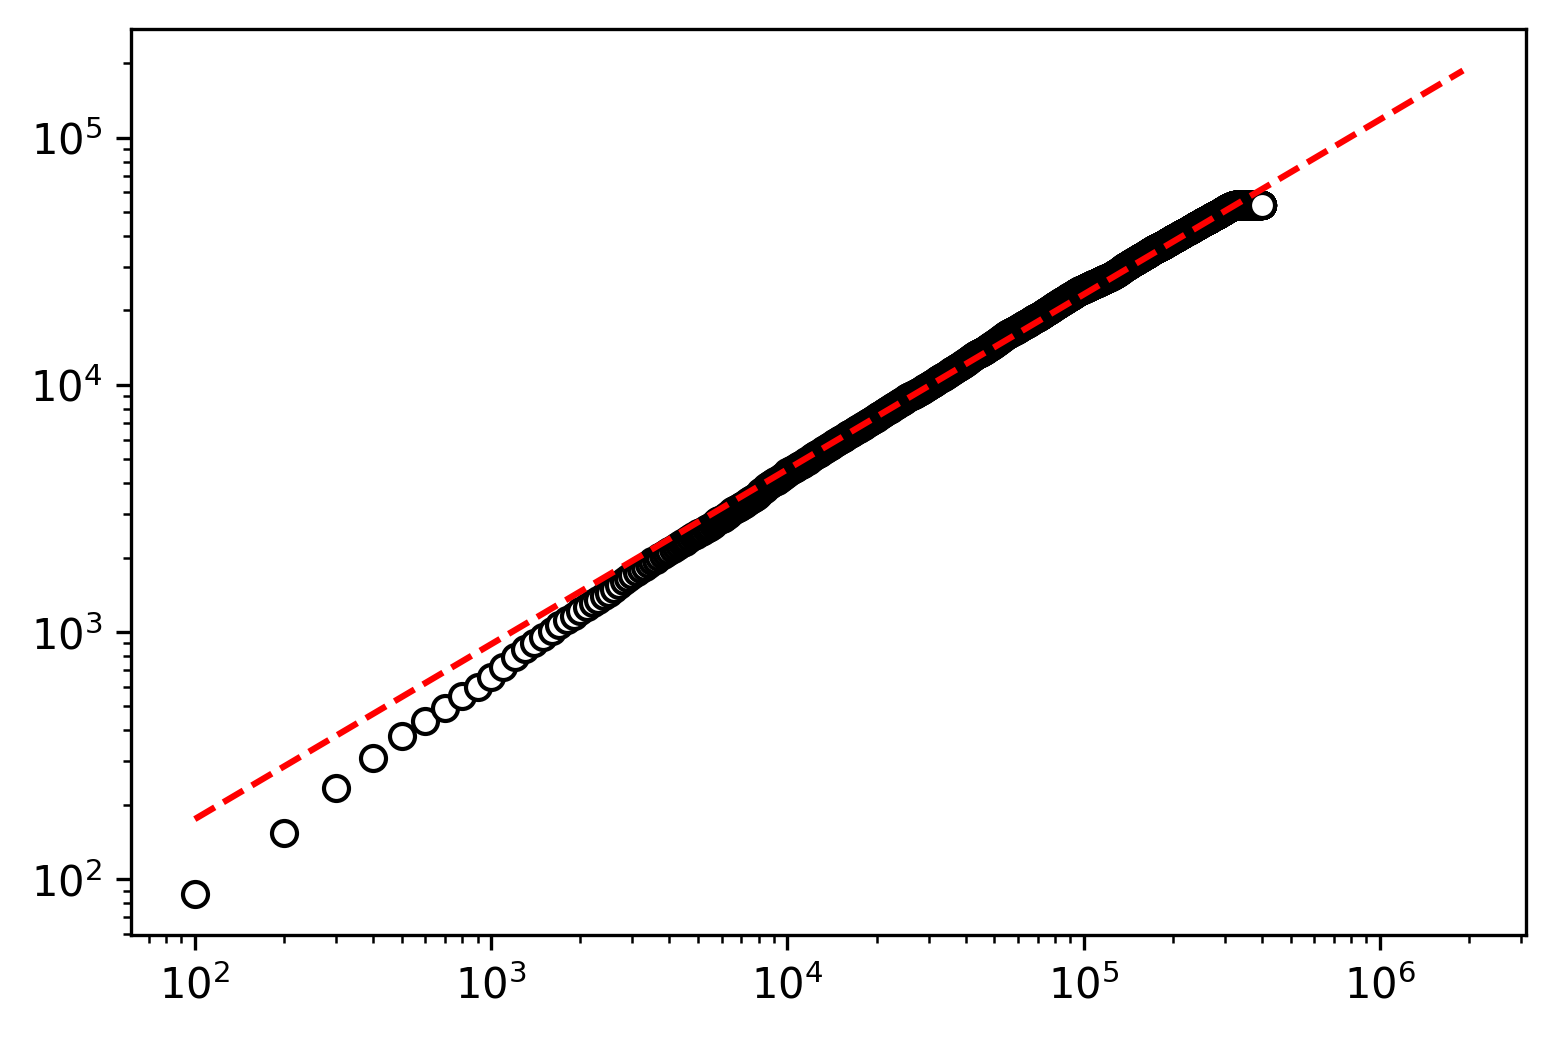

In [30]:
fig, ax = plt.subplots(dpi=300)

ax.set(xscale='log', yscale='log')

ax.scatter(growth['length'][:end], growth['vocab'][:end], edgecolor='black', facecolor='white')
ax.plot(growth['length'].to_numpy(), np.e**intercept*growth['length'].to_numpy()**slope, '--', color='red')